<a href="https://colab.research.google.com/github/kuprel/min-dalle/blob/main/min_dalle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# min(DALL·E)

### Download models and install dependencies

In [ ]:
%%shell

git clone https://github.com/kuprel/min-dalle
mkdir -p /content/min-dalle/pretrained/vqgan/
curl https://huggingface.co/dalle-mini/vqgan_imagenet_f16_16384/resolve/main/flax_model.msgpack -L --output /content/min-dalle/pretrained/vqgan/flax_model.msgpack
pip install torch flax wandb
wandb login --anonymously
wandb artifact get --root=/content/min-dalle/pretrained/dalle_bart_mega dalle-mini/dalle-mini/mega-1-fp16:v14


### Load Model

In [2]:
import os
os.chdir('/content/min-dalle')
from min_dalle.min_dalle_torch import MinDalleTorch

model = MinDalleTorch(is_mega=True, is_reusable=True)

initializing MinDalleTorch
reading files from pretrained/dalle_bart_mega
converting params to torch
initializing DalleBartEncoderTorch
initializing DalleBartDecoderTorch
initializing VQGanDetokenizer


### Generate an Image

tokenizing text
['Ġcctv']
['Ġof']
['Ġyoda']
['Ġrob', 'bing']
['Ġa']
['Ġliquor']
['Ġstore']
text tokens [0, 17685, 111, 24509, 976, 11811, 58, 13142, 1110, 2]
encoding text tokens
sampling image tokens
detokenizing image


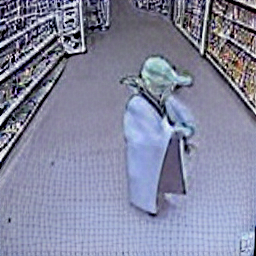

CPU times: user 7.76 s, sys: 12.6 ms, total: 7.77 s
Wall time: 7.72 s


In [11]:
%%time

text = "cctv of yoda robbing a liquor store" #@param {type:"string"}
seed = 2 #@param {type:"integer"}

display(model.generate_image(text, seed))